1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))
print("Matrix:\n", m)
totalMean = m.mean()
print("Total Mean:", totalMean)
columnsMean = np.mean(m, axis=0)
print("Columns Mean:", columnsMean)
rowsMean = np.mean(m, axis=1)
print("Rows Mean:", rowsMean)

Matrix:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total Mean: 5.5
Columns Mean: [4. 5. 6. 7.]
Rows Mean: [1.5 5.5 9.5]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
# 1. Using the function outer in numpy

u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
np.outer(u, v)


array([[ 2,  4,  6,  8],
       [ 6, 12, 18, 24],
       [10, 20, 30, 40],
       [14, 28, 42, 56]])

In [4]:
# 2. Using a nested for loop or a list comprehension

row = []
matrix = []

for i in u:
    row = []
    for j in v:
        k = i*j
        row.append(k)
    matrix.append(row)
    
matrix

[[2, 4, 6, 8], [6, 12, 18, 24], [10, 20, 30, 40], [14, 28, 42, 56]]

In [5]:
# 3. Using numpy broadcasting operations
u[:, None] * v[None, :]

array([[ 2,  4,  6,  8],
       [ 6, 12, 18, 24],
       [10, 20, 30, 40],
       [14, 28, 42, 56]])

3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [6]:
a = np.random.uniform(0, 3, [10, 6])
print("original array:\n", a, '\n')
mask = (a > 0.3)
print("the mask:\n", mask, '\n')

filtered_a = a[mask]
print("the filtered array:\n", filtered_a, '\n')
print("are a and filtered_a the same object? \033[4m", np.may_share_memory(a, filtered_a), '\033[0m\n')

a[a < 0.3] = 0
print("the modified array:\n", a, '\n')

original array:
 [[0.81779482 0.41995577 1.21440725 0.16408454 2.42932304 1.08876386]
 [2.78352977 2.66018626 2.23201939 0.78216095 0.86957758 1.42573533]
 [2.77630659 1.97201128 1.24533885 2.71673028 2.50036126 2.3200608 ]
 [0.03526593 0.34964134 2.39821633 0.71942377 1.55488752 2.96581299]
 [2.56180263 1.21214466 1.59607859 1.5028407  1.13976413 2.3055543 ]
 [0.23502593 2.08068521 0.15743568 2.98332553 0.74302011 1.89530984]
 [0.53321437 0.01051816 2.68596713 0.72673696 2.85801296 2.48711098]
 [2.07905832 1.26901066 1.8467272  2.50383648 0.63988857 0.34321269]
 [2.89493762 0.38150198 0.18185758 2.69985214 2.18328814 2.03593775]
 [1.35708249 0.64601645 0.45099514 0.368535   2.61309899 1.98852512]] 

the mask:
 [[ True  True  True False  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [False  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [False  True False  True  True  True]
 [ True False  True  True  True  True]
 [ Tru

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

slice Array = [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]

Reversed Array = [5.71198664 5.07732146 4.44265628 3.8079911  3.17332591 2.53866073
 1.90399555 1.26933037 0.63466518 0.        ]

x = 5.711986642890533
____________________________________________________________________________________________________
Sin(x) = -0.5406408174555974  Cos(x) = 0.8412535328311812  =>  Sin(x)-Cos(x) = -1.3818943502867786
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
x = 5.07732146034714
____________________________________________________________________________________________________
Sin(x) = -0.9341478602651068  Cos(x) = 0.35688622159187167  =>  Sin(x)-Cos(x) = -1.2910340818569783
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
x = 4.442656277803748
_________________________________________________________________________

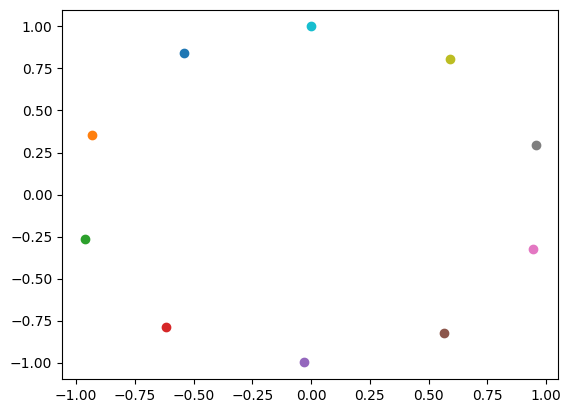

In [7]:
import matplotlib.pyplot as plt

array = np.linspace(0, 2 * np.pi, 100)
sliceArray = array[::10]
print("slice Array = {}\n".format(sliceArray))
reversedArray = sliceArray[::-1]
print("Reversed Array = {}\n".format(reversedArray))
for arr in reversedArray:
    if np.sin(arr) - np.cos(arr) < 0.1:
        print("x =", arr)
        print('_' * 100)
        print("Sin(x) = {}".format(np.sin(arr)), " Cos(x) = {}".format(np.cos(arr)), " =>  Sin(x)-Cos(x) = {}".format(np.sin(arr) - np.cos(arr)))
        print('\u203e' * 100)
    plt.plot(np.sin(arr), np.cos(arr), "o")



5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [8]:
def anti_diagonal(arr):
    return np.fliplr(arr).diagonal()

x = range(1, 11)
n = range(1, 11)

multiplicationTable = [[i*j for j in x] for i in n]
matrix = np.array(multiplicationTable)
print(matrix, "\n")
print("Matrix Trace = {}\n".format(matrix.trace()))
antiDiag = anti_diagonal(matrix)
print("Anti Diagonal = {}\n".format(antiDiag))
diagOffset = np.diagonal(matrix, offset= 1)
print("Diagonal Offset by 1 Upwards = {}\n".format(diagOffset))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

Matrix Trace = 385

Anti Diagonal = [10 18 24 28 30 30 28 24 18 10]

Diagonal Offset by 1 Upwards = [ 2  6 12 20 30 42 56 72 90]



6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [111]:
# conversion factor
convFac = 0.621371

mileVals = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = np.abs(mileVals - mileVals[:, np.newaxis])
distances
print("Miles: \n", distances)
mileToKm = distances / convFac
floatVal = np.array(list(map(lambda a: list(map(lambda x: '%.1f' %x, a)), mileToKm)))
convertedDis = floatVal.astype(np.float64)
print("\nMiles to Kilometers: \n", convertedDis)

Miles: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

Miles to Kilometers: 
 [[   0.   318.7  487.6 1184.5 1401.7 1891.  2373.8 2484.8 3078.7 3939.7]
 [ 318.7    0.   169.   865.8 1083.1 1572.3 2055.1 2166.2 2760.  3621. ]
 [ 487.6  169.     0.   696.8  914.1 1403.3 1886.2 1997.2 2591.  3452. ]
 [1184.5  865.8  696.8    0.   217.3  706.5 1189.3 1300.4 1894.2 2755.2]
 [1401.7 1083.1  914.1  217.3    0.   489.2  972.  1083.1 1676.9 2537.9]
 [1891.  1572.3 1403.3  706.5  489.2    0.   482.8  593.8 1187.7 2048.7

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [69]:
from math import ceil
import timeit

def sieve(n):
    N = np.full((n + 1), True)
    N[1] = False
    primeNumbers = []
    for i in range(2, ceil(n ** 1/2) + 1):
        if N[i]:
            for j in range(i ** 2, n + 1, i):
                N[j] = False
    for i in range(2, n + 1):
        if N[i]:
           primeNumbers.append(i)
    return primeNumbers

num = int(input("Input Number:"))
starttime = timeit.default_timer()
print("The start time is :",starttime)
print(sieve(num))
print("The time difference is :", timeit.default_timer() - starttime)

The start time is : 403031.4125249
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
The time difference is : 0.00033140002051368356


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

##### Walkers x Steps 2D Array

In [100]:
randomWalk = (2 * np.random.randint(0, 2, size=(1000, 200)) - 1)
randomWalk

array([[-1,  1,  1, ..., -1,  1, -1],
       [ 1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ..., -1, -1,  1],
       [-1,  1,  1, ..., -1,  1, -1],
       [-1,  1, -1, ...,  1,  1, -1]])

##### summing the elements in each row

In [101]:
walkingDistance = randomWalk.sum(1)
walkingDistance

array([ 24,  -6,  -6,   8,   8, -10,   4,   2,   0,  -4,   0,  -4,  -6,
       -28, -32, -10,  24, -14,  -4,  12, -16, -12,  32,   4,  16,   0,
       -12,  -2,  -2,   6, -12, -18,   4,  -4,  14, -24,  26,   8, -26,
       -16,   4,   2, -32,  -8,  -8, -10,  -6,   8,  -8,   2,  -6,   4,
        12,   4,  12,  32, -14,  -8,   4,  -2,  -4, -12, -12,   8, -16,
         6,  24,  12,   6,  26,   8,  -8,   8,  -8, -20,  -2, -12,  10,
         6,  10,  44,  -6,   4,   8,   2, -10,   0,  -4,   0,   4,   6,
         6,   8,   2, -10,  26,   0, -10,  -8,   0,  12, -20,   0,  -2,
        30, -18,   4,   4,  -6,  16, -10, -24,  -4,  -2,  -4, -38,  -2,
         4,   4,  14,   6, -10,   8,   2, -10,   4, -20,   8,  14,   6,
       -12,  22, -10,  12,  -8,  -6,  -8,  22,  12,  26,   2,  -6,  14,
         0,  -6,  18,  -6,   4,  -4,  -4, -16, -34, -28,  14,  34,  -6,
        -8,  -4,  -6,   0,  32,  -2,   4,  10,   0, -10,  -6,  14,  -4,
        20,  32,  -8,   0,  -8,   6,  10,  -6,   6,   8,   0,   

##### Square of the Previously-Obtained Array

In [105]:
distanceSquare = np.square(walkingDistance)
distanceSquare

array([ 576,   36,   36,   64,   64,  100,   16,    4,    0,   16,    0,
         16,   36,  784, 1024,  100,  576,  196,   16,  144,  256,  144,
       1024,   16,  256,    0,  144,    4,    4,   36,  144,  324,   16,
         16,  196,  576,  676,   64,  676,  256,   16,    4, 1024,   64,
         64,  100,   36,   64,   64,    4,   36,   16,  144,   16,  144,
       1024,  196,   64,   16,    4,   16,  144,  144,   64,  256,   36,
        576,  144,   36,  676,   64,   64,   64,   64,  400,    4,  144,
        100,   36,  100, 1936,   36,   16,   64,    4,  100,    0,   16,
          0,   16,   36,   36,   64,    4,  100,  676,    0,  100,   64,
          0,  144,  400,    0,    4,  900,  324,   16,   16,   36,  256,
        100,  576,   16,    4,   16, 1444,    4,   16,   16,  196,   36,
        100,   64,    4,  100,   16,  400,   64,  196,   36,  144,  484,
        100,  144,   64,   36,   64,  484,  144,  676,    4,   36,  196,
          0,   36,  324,   36,   16,   16,   16,  2

##### mean of the squared distances at each step

In [107]:
meanDistances = []
mean = 0
for i in distanceSquare:
    mean += i
    meanDistances.append(np.mean(mean))
meanDistances

[576.0,
 612.0,
 648.0,
 712.0,
 776.0,
 876.0,
 892.0,
 896.0,
 896.0,
 912.0,
 912.0,
 928.0,
 964.0,
 1748.0,
 2772.0,
 2872.0,
 3448.0,
 3644.0,
 3660.0,
 3804.0,
 4060.0,
 4204.0,
 5228.0,
 5244.0,
 5500.0,
 5500.0,
 5644.0,
 5648.0,
 5652.0,
 5688.0,
 5832.0,
 6156.0,
 6172.0,
 6188.0,
 6384.0,
 6960.0,
 7636.0,
 7700.0,
 8376.0,
 8632.0,
 8648.0,
 8652.0,
 9676.0,
 9740.0,
 9804.0,
 9904.0,
 9940.0,
 10004.0,
 10068.0,
 10072.0,
 10108.0,
 10124.0,
 10268.0,
 10284.0,
 10428.0,
 11452.0,
 11648.0,
 11712.0,
 11728.0,
 11732.0,
 11748.0,
 11892.0,
 12036.0,
 12100.0,
 12356.0,
 12392.0,
 12968.0,
 13112.0,
 13148.0,
 13824.0,
 13888.0,
 13952.0,
 14016.0,
 14080.0,
 14480.0,
 14484.0,
 14628.0,
 14728.0,
 14764.0,
 14864.0,
 16800.0,
 16836.0,
 16852.0,
 16916.0,
 16920.0,
 17020.0,
 17020.0,
 17036.0,
 17036.0,
 17052.0,
 17088.0,
 17124.0,
 17188.0,
 17192.0,
 17292.0,
 17968.0,
 17968.0,
 18068.0,
 18132.0,
 18132.0,
 18276.0,
 18676.0,
 18676.0,
 18680.0,
 19580.0,
 19904.0,


##### plot the average distances

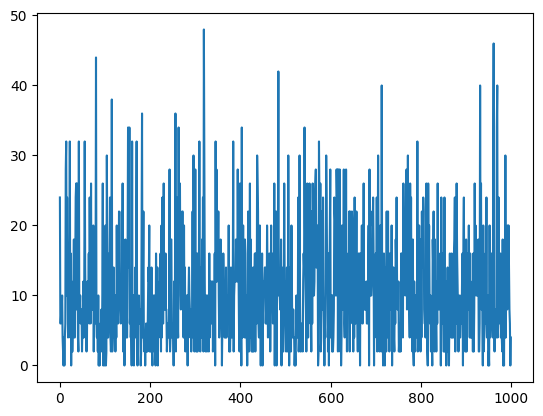

In [108]:
distances = np.sqrt(distanceSquare)
size = np.arange(0, len(distances))
plt.plot(size, distances)
plt.show()